In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dfCalendar = pd.read_csv('/Users/alex/Downloads/archive/calendar.csv')
dfListings = pd.read_csv('/Users/alex/Downloads/archive/listings.csv')
dfReviews = pd.read_csv('/Users/alex/Downloads/archive/reviews.csv')

In [3]:
#Now we will see the info of our data

In [4]:
dfCalendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [5]:
dfReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [6]:
dfListings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [7]:
#Question 1 | Get some information about 'prices' in fille listings.csv

In [8]:
#We will see some info about prices

In [9]:
#We will check if na values
dfListings['price'].isna().sum()

0

In [10]:
prices = dfListings['price'].values

In [11]:
print("First 10 Price Values:")
print(prices[:10])

First 10 Price Values:
['$250.00' '$65.00' '$65.00' '$75.00' '$79.00' '$75.00' '$100.00' '$75.00'
 '$58.00' '$229.00']


In [12]:
#Data type is obj so we will remove the $ sign and we will convert values as dollars

In [13]:
# Remove dollar signs and convert 'price' column to numeric
dfListings['price'] = dfListings['price'].replace('[\$,]', '', regex=True).astype(float)

In [14]:
prices = dfListings['price'].values

In [15]:
# Calculate statistics
avg_price = np.mean(prices)
median_price = np.median(prices)
std_dev_price = np.std(prices)
min_price = np.min(prices)
max_price = np.max(prices)

# Print the calculated statistics
print(f"Average Price: {avg_price:.2f}")
print(f"Median Price : {median_price}")
print(f"Standard Deviation: {std_dev_price:.2f}")
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")

Average Price: 173.93
Median Price : 150.0
Standard Deviation: 148.31
Minimum Price: 10.0
Maximum Price: 4000.0


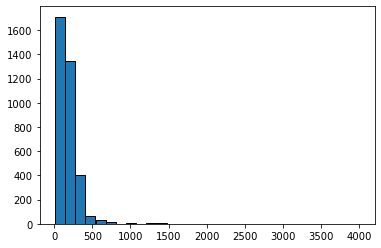

In [16]:
plt.hist(prices, bins=30, edgecolor='black')  # Adjust bins as per your data distribution
plt.show() 

In [17]:
#Now we have some info about prices

In [18]:
#Question 2 | If the place / room is available get info about price

In [19]:
# we will dig into calendar.csv

In [20]:
dfCalendar.head(500)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
495,3075044,2017-04-14,t,$75.00
496,3075044,2017-04-13,t,$65.00
497,3075044,2017-04-12,t,$65.00
498,3075044,2017-04-11,t,$65.00


In [21]:
#We will check if na values
dfCalendar['price'].isna().sum()

665853

In [22]:
#And no na values
dfCalendar['price'].notna().sum()

643037

In [23]:
#Lets find how % are the na from our total data
print (
    ((dfCalendar['price'].isna().sum() * 100) / 
       (dfCalendar['price'].notna().sum() + dfCalendar['price'].isna().sum())), "%"
)

50.87157820748879 %


In [24]:
#So now we know that we don't include more that 50% of our data - or 50% of space are not available

In [25]:
calendarPrices = dfCalendar['price'].dropna()

In [26]:
calendarPrices.head(10)

365    $65.00
366    $65.00
367    $65.00
368    $75.00
369    $75.00
370    $65.00
371    $65.00
372    $65.00
373    $65.00
374    $65.00
Name: price, dtype: object

In [27]:
#Data type is obj so we will remove the $ sign and we will convert values as dollars

In [28]:
# Remove dollar signs and convert 'price' column to numeric
calendarPrices = calendarPrices.replace('[\$,]', '', regex=True).astype(float).values

In [29]:
# Calculate statistics
avg_priceC = np.mean(calendarPrices)
median_priceC = np.median(calendarPrices)
std_dev_priceC = np.std(calendarPrices)
min_priceC = np.min(calendarPrices)
max_priceC = np.max(calendarPrices)

# Print the calculated statistics
print(f"Average Price: {avg_priceC:.2f}")
print(f"Median Price : {median_priceC}")
print(f"Standard Deviation: {std_dev_priceC:.2f}")
print(f"Minimum Price: {min_priceC}")
print(f"Maximum Price: {max_priceC}")

Average Price: 198.44
Median Price : 150.0
Standard Deviation: 180.14
Minimum Price: 11.0
Maximum Price: 7163.0


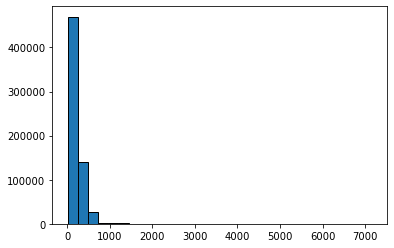

In [30]:
plt.hist(calendarPrices, bins=30, edgecolor='black')  # Adjust bins as per your data distribution
plt.show() 

In [32]:
#Question 3 | Investigate the cities that are available

In [33]:
unique_cities = dfListings['city'].unique()

# Print all unique cities

print(unique_cities)

['Boston' 'Roslindale' 'Roslindale, Boston' 'Jamaica Plain' 'Brookline'
 'Jamaica Plain, Boston' 'Jamaica Plain (Boston)' 'Roxbury Crossing'
 'Jamaica Plain ' 'Jamaica Plain, MA' 'Boston (Jamaica Plain)'
 'Jamaica plain ' 'ROXBURY CROSSING' 'Mission Hill, Boston' 'boston' '波士顿'
 'Boston, Massachusetts, US' 'South End, Boston' 'Cambridge' 'East Boston'
 'east Boston ' 'Charlestown' 'Boston (Charlestown)' 'Somerville'
 'Watertown' 'Brighton' 'Brighton ' 'Boston ' nan 'West Roxbury' 'Newton'
 'Hyde Park' 'Mattapan' 'Milton' 'Dorchester' 'dorchester, boston '
 'South Boston' 'Allston' 'ALLSTON']


In [34]:
#We will check if na values (we can see them but lets make it sure)
dfListings['city'].isna().sum()

2

In [35]:
#And no na values
dfListings['city'].notna().sum()

3583

In [36]:
#Lets find how % are the na from our total data
print (
    ((dfListings['city'].isna().sum() * 100) / 
       (dfListings['city'].notna().sum() + dfListings['city'].isna().sum())), "%"
)

0.05578800557880056 %


In [37]:
#So now we know that we don't include more that 0.05% of our data, so we can continue

In [38]:
cities = dfListings['city'].dropna().tolist()

/var/folders/v5/w_f4h47d4rq122t8jytl0_xh0000gn/T/ipykernel_23491/257555768.py:12: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from current font.
  plt.tight_layout()
/var/folders/v5/w_f4h47d4rq122t8jytl0_xh0000gn/T/ipykernel_23491/257555768.py:12: UserWarning: Glyph 22763 (\N{CJK UNIFIED IDEOGRAPH-58EB}) missing from current font.
  plt.tight_layout()
/var/folders/v5/w_f4h47d4rq122t8jytl0_xh0000gn/T/ipykernel_23491/257555768.py:12: UserWarning: Glyph 39039 (\N{CJK UNIFIED IDEOGRAPH-987F}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22763 (\N{CJK UNIFIED IDEOGRAPH-58EB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/sit

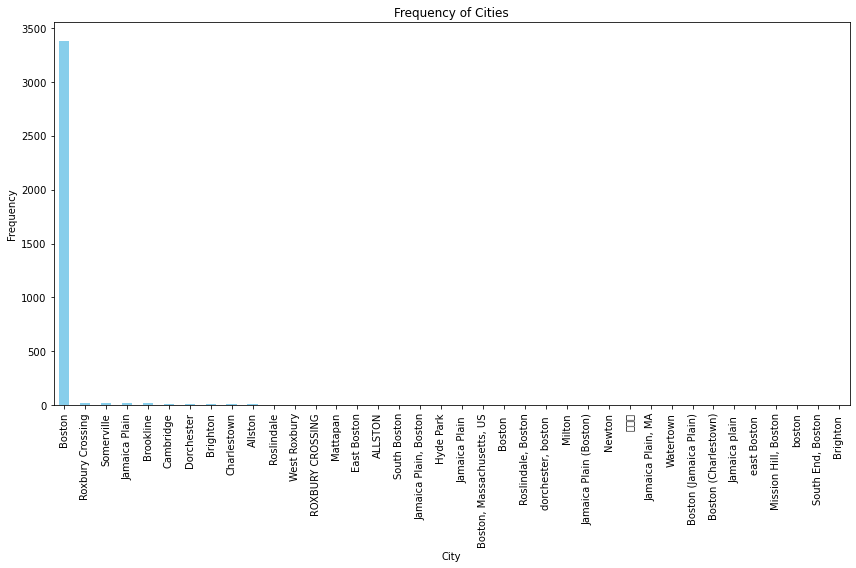

In [39]:
# Count the frequency of each city
city_counts = pd.Series(cities).value_counts()

# Plot the data

plt.figure(figsize=(12, 8))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=90) 
plt.tight_layout()  

In [41]:
# Show the plot
plt.show()

In [42]:
#We can see that we have issues with chinese characters but we can skip it for now.
#It is necessery to handle duplicate values as:

#'Jamaica Plain, Boston' 'Jamaica Plain (Boston)' 'Roxbury Crossing'
#'Jamaica Plain ' 'Jamaica Plain, MA' 'Boston (Jamaica Plain)'
#'Jamaica plain ' 'ROXBURY CROSSING'